In [410]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
import copy

In [411]:
df = pd.read_csv('CO2_Emissions.csv')
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [412]:
df = df[['Engine Size(L)','CO2 Emissions(g/km)']]
df

,Engine Size(L),CO2 Emissions(g/km)
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
7380,2.0,219
7381,2.0,232
7382,2.0,240
7383,2.0,232


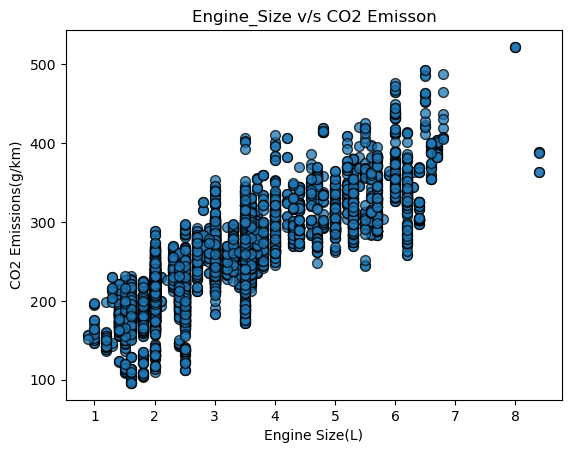

In [413]:
plt.title('Engine_Size v/s CO2 Emisson')
plt.scatter(df['Engine Size(L)'] ,df['CO2 Emissions(g/km)'] , s=50, edgecolors='black', linewidths=1, alpha = 0.75)
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emissions(g/km)')
plt.show()

In [414]:
x = np.array(df['Engine Size(L)'])
y = np.array(df['CO2 Emissions(g/km)'])

In [415]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Training Data:", x_train.shape, y_train.shape)
print("Testing Data:", x_test.shape, y_test.shape)

Training Data: (5908,) (5908,)
Testing Data: (1477,) (1477,)


In [416]:
def compute_cost(X, y, w, b, lambda_ = 1):
    
    m  = X.shape[0]
    cost = 0.
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b                                   #(n,)(n,)=scalar, see np.dot
        cost = cost + (f_wb_i - y[i])**2                               #scalar             
    cost = cost / (2 * m)                                              #scalar  
 
    reg_cost = 0
    reg_cost += (w**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar
    
    total_cost = cost + reg_cost                                       #scalar
    return total_cost      

In [417]:
initial_w = np.random.randn()
initial_b = np.random.randn()

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(f'Cost at initial w: {cost:.3f}')

Cost at initial w: 33388.800


In [418]:
def compute_gradient(X, y, w, b, lambda_): 

    m = len(X)           #(number of examples, number of features)
    dj_dw = 0.
    dj_db = 0.

    for i in range(m):                             
        err = (X[i]* w + b) - y[i]                 
        dj_dw = dj_dw + err * X[i]               
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m   
    
    
    dj_dw = dj_dw + (lambda_/m) * w

    return dj_db, dj_dw

In [419]:
initial_w = np.random.randn()
initial_b = np.random.randn()
tmp_lambda = 0.7

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b, tmp_lambda)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -250.03239805888208 -858.9915905535727


In [420]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
# number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b, 1)  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [ ]:
initial_w = np.random.randn()
initial_b = np.random.randn()

# some gradient descent settings
iterations = 4000
alpha = 0.01 / (1 + 0.0001 * iterations)

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 29579.44   
Iteration  400: Cost   487.04   
Iteration  800: Cost   550.26   
Iteration 1200: Cost   862.10   
Iteration 1600: Cost  2400.45   
Iteration 2000: Cost  9989.17   


In [ ]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Engine Size(L)')

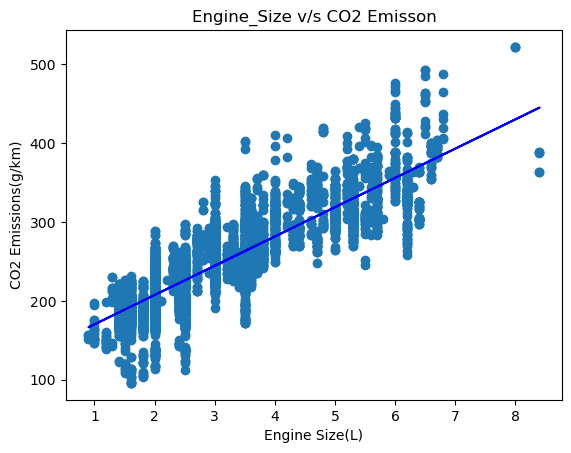

In [ ]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train) 

plt.title('Engine_Size v/s CO2 Emisson')
# Set the y-axis label
plt.ylabel('CO2 Emissions(g/km)')
# Set the x-axis label
plt.xlabel('Engine Size(L)')

In [ ]:
m1 = x_test.shape[0]
y_pred = np.zeros(m1)

for j in range(m1):
    y_pred[j] = w * x_test[j] + b

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.7242346380708404
